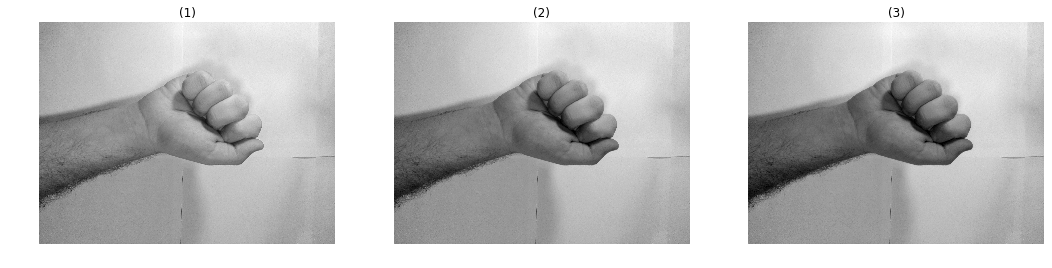

(4160, 3120, 3)


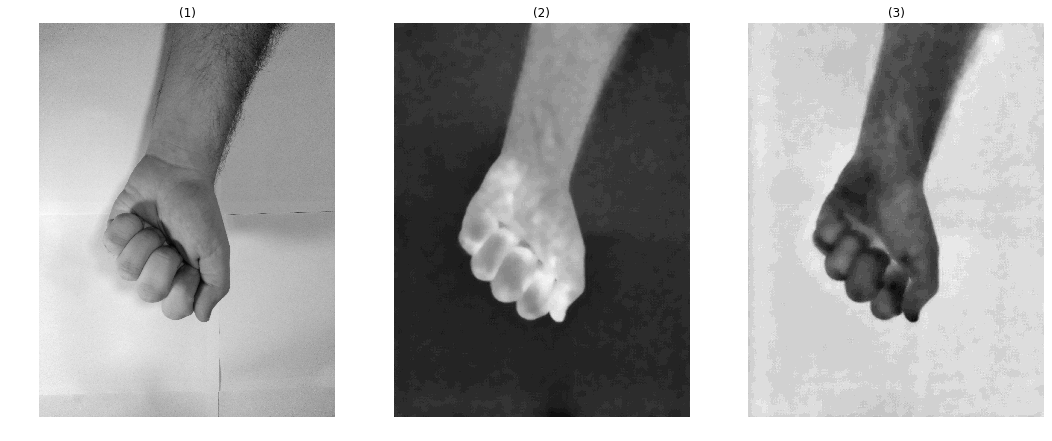

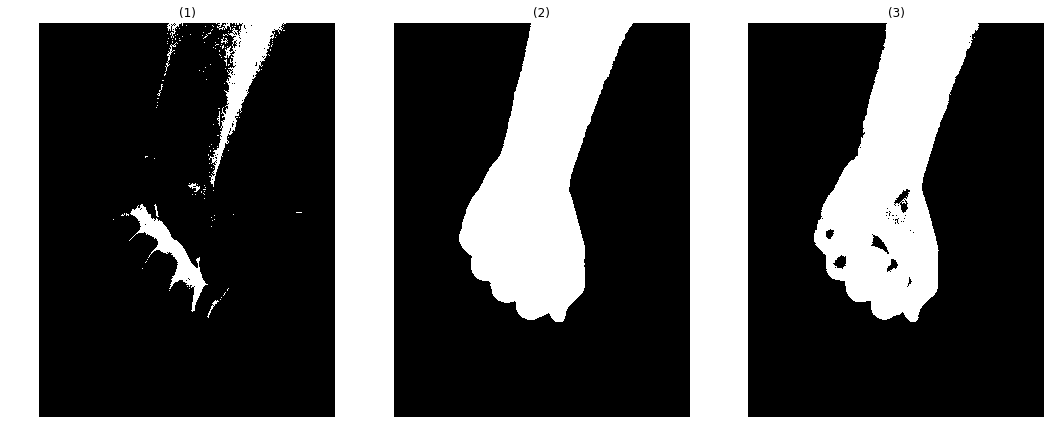

In [92]:
import cv2
from commonfunctions import * 
from scipy import ndimage as nd
import math

def Gamma_Correction(image,c,gamma):
    #gray=rgb2gray(image)
    corr=(1/255)*np.array(image)
    newImg = c*pow(corr,gamma)
    newImg=(newImg*255).astype(np.uint8)
    return newImg

img = io.imread("../images/ASL/A/A1.jpg")
#img = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
y=img[:,:,0]
cr=img[:,:,1]
cb=img[:,:,2]


# y=nd.gaussian_filter(y,1.5)
# cr=nd.gaussian_filter(cr,1.5)
# cb=nd.gaussian_filter(cb,1.5)

# y=nd.gaussian_filter(y,0.5)
# cr=nd.gaussian_filter(cr,0.5)
# cb=nd.gaussian_filter(cb,0.5)

show_images([y,cr,cb])

img=np.array([y,cr,cb])
img=np.array(img[0:3].T)
print(img.shape)

img = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)

y=img[:,:,0]
cr=img[:,:,1]
cb=img[:,:,2]


# y=Gamma_Correction(y,1,1.5)
# cr=Gamma_Correction(cr,1,0.5)
# cb=Gamma_Correction(cb,1,0.5)

show_images([y,cr,cb])

y1=y.copy()
cr1=cr.copy()
cb1=cb.copy()

y[y1>80]=0
y[y1<=80]=255

cr[cr1>=133]=255
cr[cr1<=173]=255
cr[cr1<133]=0
cr[cr1>173]=0

cb[cb1<=120]=255
cb[cb1>=80]=255
cb[cb1>120]=0
cb[cb1<80]=0



show_images([y,cr,cb])

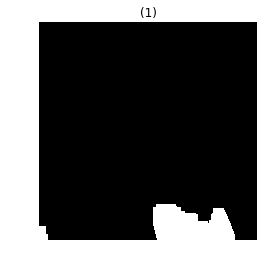

In [91]:
kernel = np.ones((5, 5), np.uint8)
#thresh=cv2.erode(cr,kernel,iterations=30)
thresh=cv2.morphologyEx(cb, cv2.MORPH_OPEN, kernel,iterations=30)
show_images([thresh])